# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [1]:
!pip install twitterscraper

  Stored in directory: C:\Users\cwcol\AppData\Local\pip\Cache\wheels\45\50\9b\70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
  Stored in directory: C:\Users\cwcol\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built twitterscraper bs4


You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [3]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [4]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [6]:
al_tweets[0].text

'RT @GeoffTheRobot: Hey Al, you played zydeco on my ribs at the RED premiere and it airs tonight on Late Late with @CraigyFerg!'

In [7]:
len(austen_tweets + al_tweets)

1141

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [253]:
# TODO - your code!
aa_text = []
for i in austen_tweets:
    aa_text.append(i.text)
al_text = []
for i in al_tweets:
    al_text.append(i.text)

In [254]:
tweet_list = aa_text+al_text
chars=''.join(tweet_list)
chars = list(set(chars))

In [255]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [180]:
#lol = list of lists
aa_char_lol = [ list(i) for i in aa_text]
al_char_lol = [list(i) for i  in al_text]

In [191]:
aa_char = [char_to_int[list(i)] for i in aa_text]

TypeError: unhashable type: 'list'

In [256]:
aa_text = np.asarray(aa_text)
al_text = np.asarray(al_text)

In [257]:
aa_text.shape[0]

181

In [258]:
aa_text[-1]

'Every single time I tweet something that is retweeted a lot I find a typo just after it’s too late'

In [259]:
x = np.concatenate((aa_text, al_text))

In [260]:
y = np.concatenate((np.ones(aa_text.shape),np.zeros(al_text.shape)))

In [261]:
def str_to_int(string):
    l = list(string)
    return [char_to_int[i] for i in l]

In [268]:
x = list(map(str_to_int, x))

In [269]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [265]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [266]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

In [270]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [271]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
batch_size=batch_size)

Train on 855 samples, validate on 286 samples
Epoch 1/15
855/855 [==============================] - ETA: 5:46 - loss: 0.6923 - acc: 0.562 - ETA: 2:47 - loss: 0.6900 - acc: 0.671 - ETA: 1:48 - loss: 0.6861 - acc: 0.718 - ETA: 1:18 - loss: 0.6835 - acc: 0.734 - ETA: 1:00 - loss: 0.6775 - acc: 0.775 - ETA: 48s - loss: 0.6698 - acc: 0.807 - ETA: 39s - loss: 0.6630 - acc: 0.82 - ETA: 33s - loss: 0.6603 - acc: 0.80 - ETA: 28s - loss: 0.6531 - acc: 0.80 - ETA: 23s - loss: 0.6421 - acc: 0.80 - ETA: 20s - loss: 0.6277 - acc: 0.81 - ETA: 17s - loss: 0.5976 - acc: 0.82 - ETA: 15s - loss: 0.6135 - acc: 0.81 - ETA: 13s - loss: 0.6132 - acc: 0.81 - ETA: 11s - loss: 0.6200 - acc: 0.81 - ETA: 9s - loss: 0.6044 - acc: 0.8164 - ETA: 8s - loss: 0.5949 - acc: 0.818 - ETA: 7s - loss: 0.5900 - acc: 0.817 - ETA: 6s - loss: 0.5828 - acc: 0.819 - ETA: 5s - loss: 0.5797 - acc: 0.815 - ETA: 4s - loss: 0.5687 - acc: 0.822 - ETA: 3s - loss: 0.5585 - acc: 0.829 - ETA: 2s - loss: 0.5577 - acc: 0.826 - ETA: 1s - loss

855/855 [==============================] - ETA: 2s - loss: 0.1847 - acc: 0.937 - ETA: 2s - loss: 0.1575 - acc: 0.937 - ETA: 2s - loss: 0.2089 - acc: 0.916 - ETA: 2s - loss: 0.2120 - acc: 0.914 - ETA: 2s - loss: 0.2091 - acc: 0.918 - ETA: 1s - loss: 0.2707 - acc: 0.895 - ETA: 1s - loss: 0.2514 - acc: 0.901 - ETA: 1s - loss: 0.2371 - acc: 0.910 - ETA: 1s - loss: 0.2484 - acc: 0.909 - ETA: 1s - loss: 0.2693 - acc: 0.900 - ETA: 1s - loss: 0.2593 - acc: 0.903 - ETA: 1s - loss: 0.2571 - acc: 0.903 - ETA: 1s - loss: 0.2470 - acc: 0.911 - ETA: 1s - loss: 0.2431 - acc: 0.912 - ETA: 1s - loss: 0.2365 - acc: 0.914 - ETA: 1s - loss: 0.2334 - acc: 0.916 - ETA: 0s - loss: 0.2348 - acc: 0.917 - ETA: 0s - loss: 0.2368 - acc: 0.916 - ETA: 0s - loss: 0.2393 - acc: 0.916 - ETA: 0s - loss: 0.2341 - acc: 0.918 - ETA: 0s - loss: 0.2297 - acc: 0.919 - ETA: 0s - loss: 0.2372 - acc: 0.916 - ETA: 0s - loss: 0.2348 - acc: 0.917 - ETA: 0s - loss: 0.2376 - acc: 0.916 - ETA: 0s - loss: 0.2332 - acc: 0.917 - ETA: 0s

286/286 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 878us/step


In [272]:
score

0.3339776355069834

In [273]:
acc

0.8881118860278097

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [124]:
!pip install google_images_download

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [125]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://www.nwf.org/-/media/NEW-WEBSITE/Programs/Garden-for-Wildlife/amphibian_bronze-frog_Julia-Bartosh_400x267.ashx
Completed Image ====> 5. amphibian_bronze-frog_julia-bartosh_400x267.ash

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

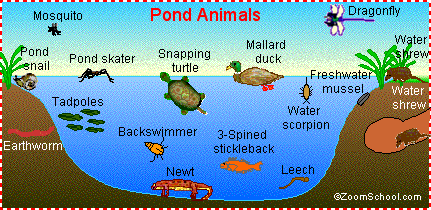

In [157]:
import os
files = os.listdir('downloads/animal-pond')
files[0]
display(Image(filename='downloads/animal-pond/'+files[0]))

In [163]:
# TODO - your code!
import numpy as np
from IPython.display import Image

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    # ideally this would work like list(fish), if results[0][1] in list(fish)
    if "fish" in results[0][1]:
        return "fish"
    if "frog" in results[0][1]:
        return "frog"
    print(results)


In [164]:
[img_contains_frog(process_img_path('downloads/animal-pond/'+i)) for i in files]

[('n03598930', 'jigsaw_puzzle', 0.8680313), ('n06359193', 'web_site', 0.06410024), ('n02834397', 'bib', 0.021264283)]
[('n04243546', 'slot', 0.8712451), ('n04476259', 'tray', 0.04993579), ('n03908618', 'pencil_box', 0.023072347)]
[('n01698640', 'American_alligator', 0.96394104), ('n01697457', 'African_crocodile', 0.026759878), ('n01737021', 'water_snake', 0.005964658)]


[None, 'fish', None, None, 'frog']

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [52]:
!pip install tpot

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
!head kc_house_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [89]:
# TODO - your code!
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2)
import pandas as pd
pd.set_option("display.max_columns",21)
import numpy as np

In [60]:
df = pd.read_csv("kc_house_data.csv")

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [104]:
x = df['date'][0]
int(x[6:8])

13

In [196]:
def get_timestamp(x):
    return pd.Timestamp(year=int(x[0:4]),month=int(x[4:6]), day = int(x[6:8]))
get_timestamp(df['date'][0])

TypeError: 'Timestamp' object is not subscriptable

array(['2014-10-13T00:00:00.000000000', '2014-12-09T00:00:00.000000000',
       '2015-02-25T00:00:00.000000000', ...,
       '2014-06-23T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2014-10-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [204]:
#df["date"] = df["date"].apply(get_timestamp)
df["date"]= df["date"].apply(lambda x: x.value)

In [205]:
X= df.drop(columns=["price"],axis=1)
y= np.log(df["price"])

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [207]:
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: -0.03617617050141491

Best pipeline: DecisionTreeRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7000000000000001, min_samples_leaf=20, min_samples_split=7, n_estimators=100), max_depth=7, min_samples_leaf=17, min_samples_split=7)
-0.03572203359656528


In [208]:

np.sqrt(tpot.score(X_test, y_test)*-1)

0.1890027343626681

## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

I think my strongest area is finding data, getting it into a dataframe, and making a useful prediction. I don't think my top skill is winning a competition competing for hundredths of percentage points. 

The two areas I want to study most are probability distributions and lower level computing problems for big data. I think getting data operations to run faster is always a problem. I am building two datasets for side projects and its moving at the speed of smell. Then, I'll be processing a bunch of text so i need something that runs fast.  I can't imagine this problem goes away.

This question merges my answer from the second and third questions. The reason I want to learn more about distributions and probability is that i think it will separate me from a majority of aspiring data scientists and because it is not widely understood. I think that AutoML stuff will become very strong. Some one might be able to make a program that does regressions on excel data. The need for dedicated personnel to run those types of analyses will be small. 
But, I think many people will misunderstand the distribution, assume a normal distribution and make faulty conclusions.
Understanding the actual distributions of data will be a strong asset in 5 years.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.